In [26]:
!pip3 install -U coinmetrics-api-client

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [27]:
!pip3 install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [1]:
# https://pypi.org/project/coinmetrics-api-client/
from coinmetrics.api_client import CoinMetricsClient

API_KEY = 'INSERT HERE'

# Community API:
client = CoinMetricsClient(API_KEY)

In [2]:
metrics = 'ReferenceRateUSD'
assets = 'sol'

In [12]:
# https://jumpcrypto.com/reflections-on-the-sept-14-solana-outage/

from datetime import datetime, timedelta

df = client.get_asset_metrics(
    assets = assets,
    metrics = metrics,
    start_time = '2021-09-12',
    end_time = '2021-09-16',
    frequency='1m'
).to_dataframe()

In [13]:
df

,asset,time,ReferenceRateUSD
0,sol,2021-09-12 00:00:00+00:00,179.1666
1,sol,2021-09-12 00:01:00+00:00,177.344746
2,sol,2021-09-12 00:02:00+00:00,177.7755
3,sol,2021-09-12 00:03:00+00:00,178.2653
4,sol,2021-09-12 00:04:00+00:00,178.250743
...,...,...,...
7195,sol,2021-09-16 23:55:00+00:00,152.0076
7196,sol,2021-09-16 23:56:00+00:00,152.0152
7197,sol,2021-09-16 23:57:00+00:00,152.039024
7198,sol,2021-09-16 23:58:00+00:00,152.33


In [14]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

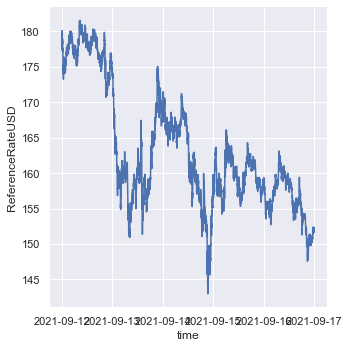

In [15]:
sns.relplot(
    data=df, kind="line",
    x="time", y="ReferenceRateUSD"
)

In [20]:
df2 = df[(df.time >= '2021-09-14') & (df.time <= '2021-09-15')]

print(df.size)
print(df2.size)

21600
4323


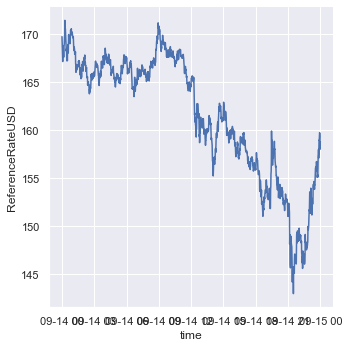

In [21]:
sns.relplot(
    data=df2, kind="line",
    x="time", y="ReferenceRateUSD"
)

In [22]:
df2['time']

2880   2021-09-14 00:00:00+00:00
2881   2021-09-14 00:01:00+00:00
2882   2021-09-14 00:02:00+00:00
2883   2021-09-14 00:03:00+00:00
2884   2021-09-14 00:04:00+00:00
                  ...           
4316   2021-09-14 23:56:00+00:00
4317   2021-09-14 23:57:00+00:00
4318   2021-09-14 23:58:00+00:00
4319   2021-09-14 23:59:00+00:00
4320   2021-09-15 00:00:00+00:00
Name: time, Length: 1441, dtype: datetime64[ns, tzutc()]

In [23]:
# https://jumpcrypto.com/reflections-on-the-sept-14-solana-outage/

from datetime import datetime, timedelta

df3 = client.get_asset_metrics(
    assets = assets,
    metrics = ['CapMrktEstUSD'],
    start_time = '2021-09-12',
    end_time = '2021-09-16',
    frequency='1m'
).to_dataframe()

Error found for the query: 
 https://api.coinmetrics.io/v4/timeseries/asset-metrics?api_key=INSERT_KEY&assets=sol&metrics=CapMrktEstUSD&frequency=1m&paging_from=start&start_time=2021-09-12&end_time=2021-09-16
Error details: {'type': 'bad_parameter', 'message': "Bad parameter 'metrics'. All requested metrics aren't supported for asset 'sol' and frequency '1m'."}


HTTPError: 400 Client Error: Bad Request for url: https://api.coinmetrics.io/v4/timeseries/asset-metrics?api_key=INSERT_KEY&assets=sol&metrics=CapMrktEstUSD&frequency=1m&paging_from=start&start_time=2021-09-12&end_time=2021-09-16